In [1]:
import maboss
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
sns.set_style("white")
colormap_scale = sns.light_palette("black", as_cmap=True)
colormap_ratios = sns.diverging_palette(240, 0, center='light', as_cmap=True)
def save_figure(figure, title):
    #figure.savefig("%s.png" % title, bbox_inches="tight")
    figure.savefig("%s.pdf" % title, bbox_inches="tight")

In [3]:
bnd = 'ICD_ExtendDy.bnd'
cfg = 'ICD_ExtendDy.cfg'
upp = 'ICD_ExtendDy.upp'

In [4]:
sim = maboss.load(bnd,cfg)
sim.print_cfg()

$nb_mutable = 0;
$rate_ATP_i_2 = 1/4;
$rate_ATP_i_7 = 1/4;
$rate_CALR_i = 1/4;
$rate_HMGB1_i = 1/6;
$rate_ANXA1_i = 1/6;
$rate_IFN1_i = 1/6;
$rate_CXCL10_i = 1/6;
$rate_CD80_i = 1/6;
$rate_MHC_II_i = 1/6;
$rate_IL1B_i = 1/6;
$rate_IL2_i = 1/6;
$rate_IL4_i = 1/6;
$rate_IL6_i = 1/6;
$rate_IL12_i = 1/6;
$rate_IL17_i = 1/6;
$rate_IFNg_i = 1/6;
$rate_TGFb_i = 1/6;
$rate_MHC_I_i = 1/6;
$rate_perforin = 0.0;
$pop_Tumor = 0.0;
$clonal_exp_rate = 0.05;
$growth_tumor = 0.00001;
$ChemoEffect = 0.00002;
$PerforinDeath = 1/240;
$PerforinRecycled = 6;
$degChemo = 1/(24*3);
$effectChemo = 1;
$u_aDC = 50;
$u_Th1 = 50;
$u_Th2 = 50;
$u_Th17 = 50;
$u_Treg = 50;
$u_preCTL = 50;
$u_CTL = 5/12;
$u_CD28 = 0.0;
$u_CXCR3 = 0.0;
$u_FPR1 = 0.0;
$u_IFN1_rec = 0.0;
$u_IFNg_rec = 0.0;
$d_IFNg_rec = 50;
$u_IL12_rec = 0.0;
$d_IL12_rec = 50;
$u_IL17_rec = 0.0;
$d_IL17_rec = 50;
$u_IL1B_rec = 0.0;
$u_IL2_rec = 0.0;
$u_IL4_rec = 0.0;
$d_IL4_rec = 50;
$u_IL6_rec = 0.0;
$d_IL6_rec = 50;
$u_LRP1 = 0.0;
$u_P2X7R = 0.0;
$u_P

In [5]:
WT = maboss.UpdatePopulation(sim,upp)


In [6]:
start = time.time()
WT_res = WT.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  11.089605351289114  mins


In [7]:
nodes=('Tumor','DC','aDC','cd4','cd8','Th1','Th2','Th17','Treg','preCTL','CTL','CALR_o','HMGB1_o','Perforin_o')

In [8]:
WT_table = WT_res.get_nodes_stepwise_probability_distribution(nodes)

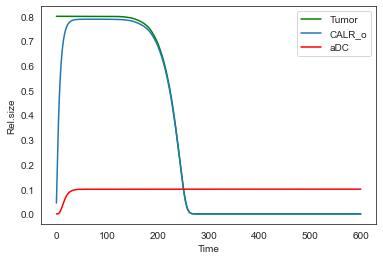

In [9]:
adc = plt.figure()
plt.plot(WT_table['PopRatio']*WT_table['Tumor'],'-g',label="Tumor")
plt.plot(WT_table['PopRatio']*WT_table['CALR_o'],'-',label="CALR_o")
plt.plot(WT_table['PopRatio']*WT_table['aDC'],'-r',label="aDC")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(adc,"aDC_Tumor_CALR")

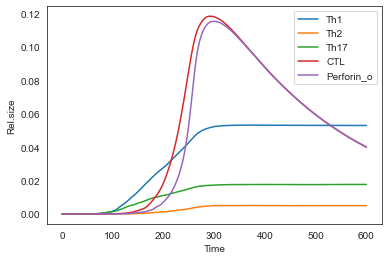

In [10]:
Tcells = plt.figure()
plt.plot(WT_table['PopRatio']*WT_table['Th1'],label="Th1")
plt.plot(WT_table['PopRatio']*WT_table['Th2'],label="Th2")
plt.plot(WT_table['PopRatio']*WT_table['Th17'],label="Th17")
plt.plot(WT_table['PopRatio']*WT_table['CTL'],label="CTL")
plt.plot(WT_table['PopRatio']*WT_table['Perforin_o'],label="Perforin_o")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(Tcells,"Tcells")

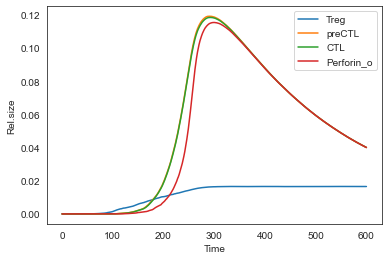

In [11]:
NTcells = plt.figure()
plt.plot(WT_table['PopRatio']*WT_table['Treg'],label="Treg")
plt.plot(WT_table['PopRatio']*WT_table['preCTL'],label="preCTL")
plt.plot(WT_table['PopRatio']*WT_table['CTL'],label="CTL")
plt.plot(WT_table['PopRatio']*WT_table['Perforin_o'],label="Perforin_o")
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.legend()
save_figure(NTcells,"other_Tcells")

 __Higher initial DC population__  (i.e. $\text{initial pop}\cdot 1.5$)

In [12]:
HighDC_sim = maboss.load(bnd,cfg)
HighDC_sim.param['$InitDC'] = 0.15
HighDC = maboss.UpdatePopulation(HighDC_sim,upp)

In [17]:
start = time.time()
HighDC_res = HighDC.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  10.844612650076549  mins


In [18]:
HighDC_table = HighDC_res.get_nodes_stepwise_probability_distribution(nodes)

__Low DC population__ (i.e. $\text{initial pop}/ 1.5$)

In [19]:
LowDC_sim = maboss.load(bnd,cfg)
LowDC_sim.param['$InitDC'] = 0.067
LowDC = maboss.UpdatePopulation(LowDC_sim,upp)

In [20]:
start = time.time()
LowDC_res = LowDC.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  11.333686661720275  mins


In [21]:
LowDC_table = LowDC_res.get_nodes_stepwise_probability_distribution(nodes)

__Faster Clonal expansion__ (i.e. $\text{initial pop}\cdot 1.5$)

In [22]:
FastClonal_sim = maboss.load(bnd,cfg)
FastClonal_sim.param['$clonal_exp_rate'] = 0.075
FastClonal = maboss.UpdatePopulation(FastClonal_sim,upp)

In [23]:
start = time.time()
FastClonal_res = FastClonal.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  11.02349892059962  mins


In [24]:
FastClonal_table = FastClonal_res.get_nodes_stepwise_probability_distribution(nodes)

__Slower Clonal expansion__ (i.e. $\text{initial pop} / 1.5$)

In [25]:
SlowClonal_sim = maboss.load(bnd,cfg)
SlowClonal_sim.param['$clonal_exp_rate'] = 0.033
SlowClonal = maboss.UpdatePopulation(SlowClonal_sim,upp)

In [26]:
start = time.time()
SlowClonal_res = SlowClonal.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  11.110936935742696  mins


In [27]:
SlowClonal_table = SlowClonal_res.get_nodes_stepwise_probability_distribution(nodes)

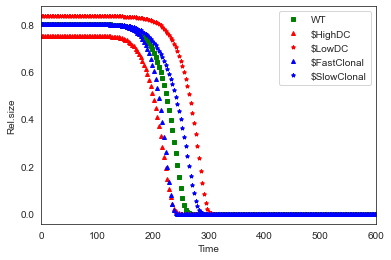

In [94]:
mutants_vs_WT = plt.figure()
plt.plot(range(0,601)[1:600:3],WT_table['PopRatio'][1:600:3]*WT_table['Tumor'][1:600:3],
         "sg",label="WT",markersize=4)
plt.plot(range(0,601)[1:600:3],HighDC_table['PopRatio'][1:600:3]*HighDC_table['Tumor'][1:600:3],
         "^r",label="$HighDC",markersize=4)
plt.plot(range(0,601)[1:600:3],LowDC_table['PopRatio'][1:600:3]*LowDC_table['Tumor'][1:600:3],
         "*r",label="$LowDC",markersize=4)
plt.plot(range(0,601)[1:600:3],FastClonal_table['PopRatio'][1:600:3]*FastClonal_table['Tumor'][1:600:3],
         "^b",label="$FastClonal",markersize=4)
plt.plot(range(0,601)[1:600:3],SlowClonal_table['PopRatio'][1:600:3]*SlowClonal_table['Tumor'][1:600:3],
         "*b",label="$SlowClonal",markersize=4)
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.xlim(left=0, right=600)
plt.legend()
save_figure(mutants_vs_WT,"mutants_vs_WT")


__CD28 mutant__

In [130]:
CD28Down_sim = maboss.load(bnd,cfg)
upp = 'ICD_ExtendDy_DownCD28.upp'
CD28Down = maboss.UpdatePopulation(CD28Down_sim,upp)

In [131]:
start = time.time()
CD28Down_res = CD28Down.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  11.376336654027304  mins


In [132]:
nodes=('Tumor','DC')

In [133]:
CD28Down_table = CD28Down_res.get_nodes_stepwise_probability_distribution(nodes)

In [134]:
IL2Up_sim = maboss.load(bnd,cfg)
upp = 'ICD_ExtendDy_UpIL2_rec.upp'
IL2Up = maboss.UpdatePopulation(IL2Up_sim,upp)

In [139]:
start = time.time()
IL2Up_res = IL2Up.run()
stop = time.time()
duration = (stop-start)/60
print("exec. time: ",duration," mins")

exec. time:  12.075857798258463  mins


In [136]:
nodes=('Tumor','DC')

In [137]:
IL2Up_table = IL2Up_res.get_nodes_stepwise_probability_distribution(nodes)

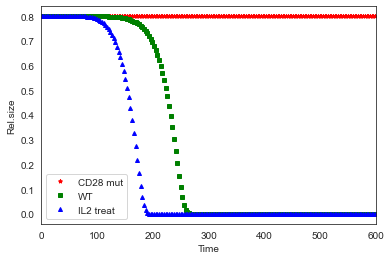

In [140]:
model_modifications = plt.figure()
plt.plot(range(0,601)[1:600:3],CD28Down_table['PopRatio'][1:600:3]*CD28Down_table['Tumor'][1:600:3],
         "*r",label="CD28 mut",markersize=4)
plt.plot(range(0,601)[1:600:3],WT_table['PopRatio'][1:600:3]*WT_table['Tumor'][1:600:3],
         "sg",label="WT",markersize=4)
plt.plot(range(0,601)[1:600:3],IL2Up_table['PopRatio'][1:600:3]*IL2Up_table['Tumor'][1:600:3],
         "^b",label="IL2 treat",markersize=4)
plt.ylabel("Rel.size")
plt.xlabel("Time")
plt.xlim(left=0, right=600)
plt.legend()
save_figure(model_modifications,"model_modification")